## 6.2 Univariable Plots
### 6.2.2 Histograms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fires = pd.read_csv("data/VIIRSNDE_global2018312.v1.0.txt")
fires.head()

# print(plt.rcParams['figure.figsize'])
# plt.rcParams.update({'font.size': 16, 'figure.figsize':[12,6]})
# print(plt.rcParams['figure.figsize'])

,Lon,Lat,Mask,Conf,brt_t13(K),frp(MW),line,sample,Sat,YearDay,Hour
0,27.110006,30.769241,8,52,302.877533,5.814295,242,1735,NDE,2018312,1
1,26.083252,30.534357,9,100,332.959717,24.340988,301,1620,NDE,2018312,1
2,34.865997,28.162659,8,38,301.165985,6.107953,396,2589,NDE,2018312,1
3,34.872623,28.161121,8,71,307.277985,9.287819,396,2590,NDE,2018312,1
4,34.865070,28.158880,8,39,301.227783,6.001442,402,2590,NDE,2018312,1


In [2]:
bins10MW = np.arange(0, 500, 10)

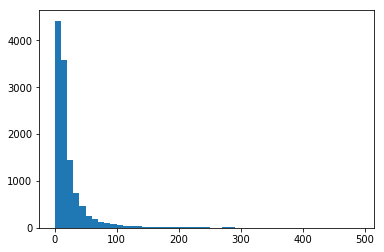

In [3]:
plt.figure()
plt.hist(fires['frp(MW)'], bins=bins10MW)
plt.show()

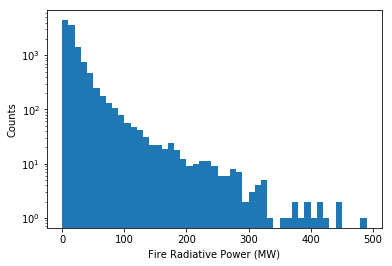

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(fires['frp(MW)'], bins=bins10MW)
ax.set_yscale('log')
ax.set_xlabel("Fire Radiative Power (MW)")
ax.set_ylabel("Counts")
plt.show()

### 6.2.2 Barplots

In [5]:
ranges = [0.0, 100.0, 200.0, 1000.0]
categories = ['low', 'mid', 'high']

intensity = pd.cut(fires['frp(MW)'], bins=ranges, include_lowest=True, labels=categories)
intensity.head()

0    low
1    low
2    low
3    low
4    low
Name: frp(MW), dtype: category
Categories (3, object): [low < mid < high]

In [6]:
intensity_counts = intensity.value_counts()

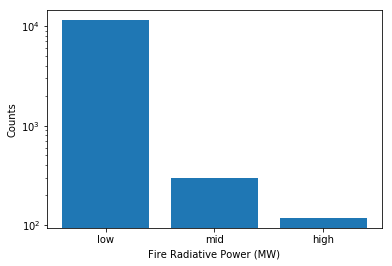

In [7]:
plt.figure()
ax = plt.subplot(111)
ax.bar(x=intensity_counts.index, height=intensity_counts)
ax.set_yscale('log')
ax.set_xlabel("Fire Radiative Power (MW)")
ax.set_ylabel("Counts")
plt.show()

## 6.3 Two Variable Plots

In [8]:
import pandas as pd
fname = 'data/campfire-gases-2018-11.csv'
trace_gases = pd.read_csv(fname)
trace_gases.columns

Index(['Latitude', 'Longitude', 'Time', 'H2O_MR_500mb', 'H2O_MR_850mb',
       'CO_MR_500mb', 'CO_MR_850mb', 'O3_MR_500mb', 'O3_MR_850mb',
       'CH4_MR_500mb', 'CH4_MR_850mb', 'N2O_MR_500mb', 'N2O_MR_850mb',
       'CO2_500mb', 'CO2_850mb', 'datetime'],
      dtype='object')

In [9]:
trace_gases.sort_values(by='Time', inplace=True)
trace_gases.Time.values[0], trace_gases.Time.values[-1]

('2018-11-01 10:39:44.183998108', '2018-11-30 21:18:20.384000778')

In [10]:
trace_gases['Time'].head()

0    2018-11-01 10:39:44.183998108
1    2018-11-01 10:39:44.383998871
2    2018-11-01 10:39:52.183998108
3    2018-11-01 10:39:52.383998871
4    2018-11-01 10:40:00.184000015
Name: Time, dtype: object

In [11]:
fmt = '%Y-%m-%d %H:%M:%S'
trace_gases['Time'] = pd.to_datetime(trace_gases['Time'], format=fmt)
trace_gases['Time'].head()

0   2018-11-01 10:39:44.183998108
1   2018-11-01 10:39:44.383998871
2   2018-11-01 10:39:52.183998108
3   2018-11-01 10:39:52.383998871
4   2018-11-01 10:40:00.184000015
Name: Time, dtype: datetime64[ns]

In [12]:
# Options to print figures into notebook/increase size
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

In [13]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [12, 6]})

In [14]:
ylabel = '$\mathregular{H_2}$O mixing ratio'

In [15]:
mr = trace_gases['H2O_MR_850mb'].values
t = trace_gases['Time'].values

In [16]:
import datetime
xlims = [datetime.date(2018, 11, 1), datetime.date(2018, 12, 1)]
ylims = [0, 0.015]
ylabel = '$\mathregular{H_2O}$ mixing ratio'

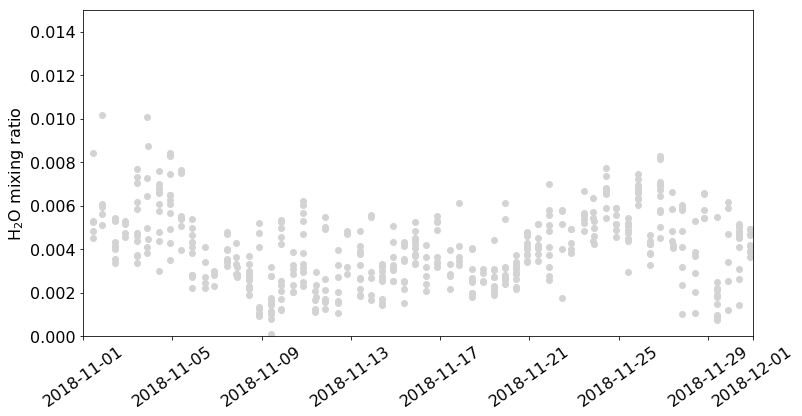

In [17]:
plt.rcParams.update({'font.size': 16, 'figure.figsize':[12,6]})

fig = plt.figure()
ax = plt.subplot(111)

ax.scatter(t, mr, c='lightgrey')
plt.xticks(rotation=35)
ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])

ax.set_ylabel(ylabel)
plt.show()

### 6.3.4 Line Plots

In [18]:
trace_gases['Lon'] = trace_gases['Latitude'].round()
groups = trace_gases.groupby(trace_gases['Lon'])
dailyAvg = groups.mean()
dailyAvg.head()

,Latitude,Longitude,H2O_MR_500mb,H2O_MR_850mb,CO_MR_500mb,CO_MR_850mb,O3_MR_500mb,O3_MR_850mb,CH4_MR_500mb,CH4_MR_850mb,N2O_MR_500mb,N2O_MR_850mb,CO2_500mb,CO2_850mb,Lon
Lon,,,,,,,,,,,,,,,
39.0,39.094258,-121.168585,0.000722,0.003868,98.627667,128.836318,56.663175,24.151236,1914.424077,1908.244976,320.079671,321.040110,403.829681,403.465159,39.0
40.0,39.939620,-121.219145,0.000703,0.004285,102.643743,126.567971,56.053443,23.997282,1906.837215,1906.476610,319.854790,320.465311,403.203167,403.203880,40.0


In [19]:
daily_average = trace_gases.resample('D', on='Time').mean()
daily_average = daily_average.reset_index()

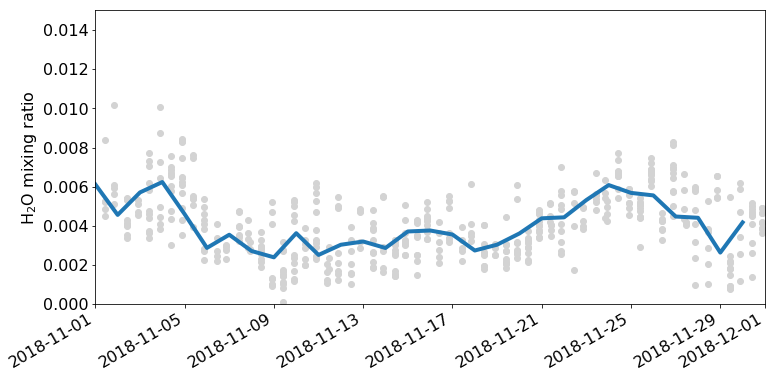

In [20]:
fig = plt.figure()
ax = plt.subplot(111)

#[ax.scatter(x, trace_gases['H2O_MR_850mb'][i], c='lightgrey') for i, x in enumerate(trace_gases['Time'])]
ax.scatter(t, mr, c='lightgrey')
ax.plot(daily_average['Time'], daily_average['H2O_MR_850mb'], linewidth=4)

ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])

ax.set_ylabel(ylabel)

fig.autofmt_xdate()

plt.show()

### 6.3.5 Adding data to an existing plot

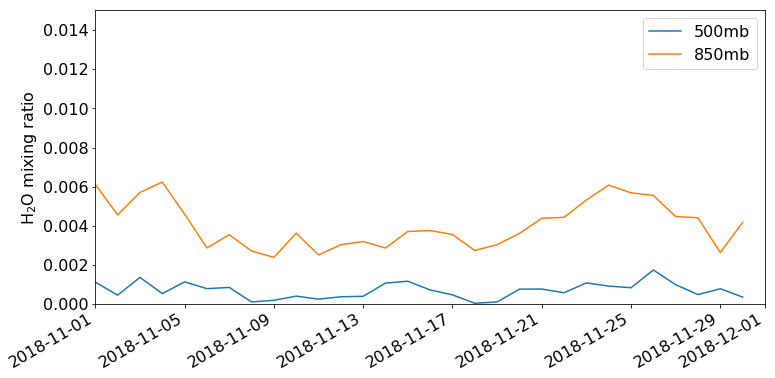

In [21]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(daily_average['Time'], daily_average['H2O_MR_500mb'], label='500mb')
ax.plot(daily_average['Time'], daily_average['H2O_MR_850mb'], label='850mb')

ax.legend(loc='upper right')

ax.set_xlim(xlims[0], xlims[1])
ax.set_ylim(ylims[0], ylims[1])
ax.set_ylabel(ylabel)

fig.autofmt_xdate()

plt.show()

### 6.3.6 Plotting two side-by-side plots

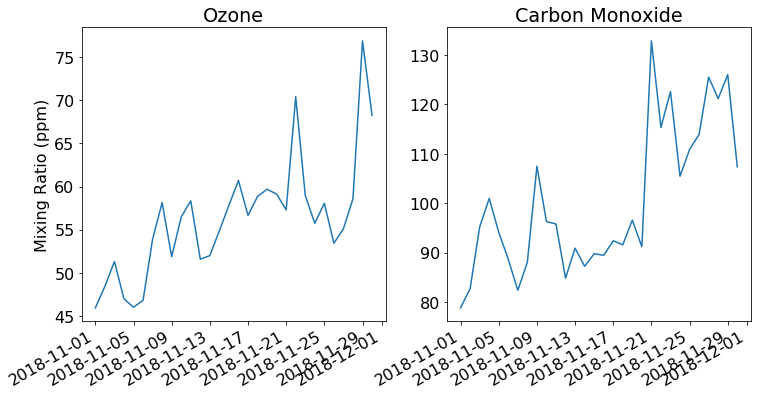

In [22]:
fig, ax = plt.subplots(ncols=2)

ax[0].set_title('Ozone')
ax[0].plot(daily_average['Time'], daily_average['O3_MR_500mb'])
ax[0].set_ylabel("Mixing Ratio (ppm)")

ax[1].set_title('Carbon Monoxide')
ax[1].plot(daily_average['Time'], daily_average['CO_MR_500mb'])


fig.autofmt_xdate()
plt.show()

### 6.3.7 Skew-T

In [23]:
import xarray as xr
from metpy.units import units
import metpy.calc as mpcalc
from metpy.plots import SkewT

In [24]:
fname = 'data/NUCAPS-EDR_v2r0_npp_s201903031848390_e201903031849090_c201903031941100.nc'
nucaps = xr.open_dataset(fname, decode_times=False)
list(nucaps.H2O_MR.attrs)

['long_name', 'units', 'parameter_type', 'valid_range']

In [25]:
nucaps.H2O_MR.units, nucaps.Temperature.units, nucaps.Pressure.units

('kg/kg', 'Kelvin', 'mb')

In [26]:
nucaps.Number_of_P_Levels

<xarray.DataArray 'Number_of_P_Levels' (Number_of_P_Levels: 100)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)
Dimensions without coordinates: Number_of_P_Levels

In [27]:
df = nucaps.sel(Number_of_CrIS_FORs=1)

In [28]:
df.H2O_MR.dims

('Number_of_P_Levels',)

In [29]:
T = df.Temperature.values.flatten()*units('K')
MR = df.H2O_MR.values.flatten()*units('kg/kg')
P = df.Effective_Pressure.values.flatten()*units('millibar')

In [30]:
RH = mpcalc.relative_humidity_from_mixing_ratio(MR, T, P)
Td = mpcalc.dewpoint_rh(T, RH).to('K')

C:\Users\rebekah\Anaconda3\lib\site-packages\metpy\calc\thermo.py:690: RuntimeWarning: invalid value encountered in log
  val = np.log(e / sat_pressure_0c)
C:\Users\rebekah\Anaconda3\lib\site-packages\pint\quantity.py:1403: RuntimeWarning: invalid value encountered in log
  out = uf(*mobjs)


In [31]:
mask = (RH > 0) & (RH < 100) & (Td < T)

C:\Users\rebekah\Anaconda3\lib\site-packages\pint\quantity.py:1070: RuntimeWarning: invalid value encountered in less
  return op(self._magnitude, other._magnitude)


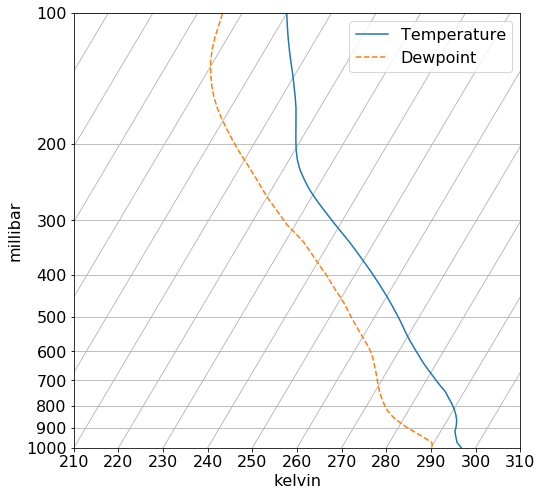

In [32]:
# Generate plot
fig = plt.figure(figsize=[8,8])
skew = SkewT(fig, subplot=111)

skew.plot(P[mask], T[mask])
skew.plot(P[mask], Td[mask], linestyle='--')

plt.ylim(1000, 100)
plt.xlim(210, 310)

plt.legend(['Temperature', 'Dewpoint'])
plt.show()

## Three Variable Plots
### 6.4.1 Filled contour

In [33]:
import h5py
import numpy as np

In [34]:
fname = 'data/MOP03JM-201811-L3V95.6.3.he5' 
file_id = h5py.File(fname, 'r')

In [35]:
#file_id.visit(print)
plt.rcParams.update({'font.size': 16, 'figure.figsize':[8,6]})

In [36]:
file_id.visit(print)

HDFEOS
HDFEOS/ADDITIONAL
HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
HDFEOS/GRIDS
HDFEOS/GRIDS/MOP03
HDFEOS/GRIDS/MOP03/Data Fields
HDFEOS/GRIDS/MOP03/Data Fields/RetrievalAveragingKernelMatrixDay
HDFEOS/GRIDS/MOP03/Data Fields/MeasurementErrorCovarianceMatrixNight
HDFEOS/GRIDS/MOP03/Data Fields/APrioriSurfaceEmissivityNight
HDFEOS/GRIDS/MOP03/Data Fields/RetrievalAveragingKernelMatrixNight
HDFEOS/GRIDS/MOP03/Data Fields/DegreesofFreedomforSignalDay
HDFEOS/GRIDS/MOP03/Data Fields/RetrievedCOSurfaceMixingRatioDay
HDFEOS/GRIDS/MOP03/Data Fields/SatelliteZenithAngleNight
HDFEOS/GRIDS/MOP03/Data Fields/DryAirColumnNight
HDFEOS/GRIDS/MOP03/Data Fields/RetrievedSurfaceTemperatureVariabilityDay
HDFEOS/GRIDS/MOP03/Data Fields/RetrievedCOMixingRatioProfileDay
HDFEOS/GRIDS/MOP03/Data Fields/SignalChi2VariabilityDay
HDFEOS/GRIDS/MOP03/Data Fields/RetrievalErrorCovarianceMatrixNight
HDFEOS/GRIDS/MOP03/Data Fields/DEMAltitudeVariabilityDay
HDFEOS/GRIDS/MOP03/Data Fields/APrioriCOTotalColumnNight
HDFEOS/GRIDS

In [37]:
#file_id.visit(print)
grp_name="HDFEOS/GRIDS/MOP03/Data Fields/"

co = file_id[grp_name+"RetrievedCOTotalColumnDay"][:,:]
lat = file_id[grp_name+"Latitude"][:]
lon = file_id[grp_name+"Longitude"][:]

In [38]:
missing = file_id[grp_name+"RetrievedCOTotalColumnDay"].attrs['_FillValue']
co[co== missing]=np.nan

In [39]:
X, Y = np.meshgrid(lon, lat)

In [40]:
co.shape, X.shape

((360, 180), (180, 360))

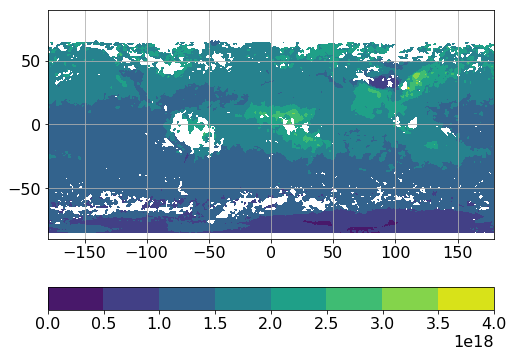

In [41]:
plt.figure()

plt.contourf(X, Y, co.transpose())
plt.colorbar(orientation='horizontal')

plt.grid(True)

plt.show()

In [42]:
fires["lon_bin"] = fires["Lon"].round(-1)
fires["lat_bin"] = fires["Lat"].round(-1)
fire_count = fires.groupby(["lon_bin", "lat_bin"]).size()

In [43]:
fire_count = fire_count.reset_index(name="Count")
fire_count.head()

,lon_bin,lat_bin,Count
0,-160.0,60.0,3
1,-120.0,40.0,188
2,-120.0,50.0,142
3,-110.0,30.0,13
4,-110.0,40.0,4


In [44]:
fire_count_3D = fire_count.pivot(index='lat_bin', columns='lon_bin', values='Count')
fire_count_3D.head()

lon_bin,-160.0,-120.0,-110.0,-100.0,-90.0,-80.0,-70.0,-60.0,-50.0,-40.0,...,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0
lat_bin,,,,,,,,,,,,,,,,,,,,,
-40.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN
-30.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,67.0,9.0,NaN,...,NaN,NaN,NaN,NaN,50.0,NaN,1.0,25.0,NaN,NaN
-20.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,42.0,2.0,1.0,...,NaN,NaN,NaN,NaN,219.0,249.0,246.0,81.0,7.0,3.0
-10.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,31.0,174.0,...,NaN,NaN,NaN,NaN,5.0,83.0,112.0,NaN,NaN,NaN
0.0,NaN,NaN,NaN,NaN,NaN,1.0,15.0,28.0,302.0,163.0,...,NaN,NaN,10.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN


In [45]:
X, Y = np.meshgrid(fire_count_3D.columns, fire_count_3D.index)

In [46]:
from matplotlib import ticker, colors

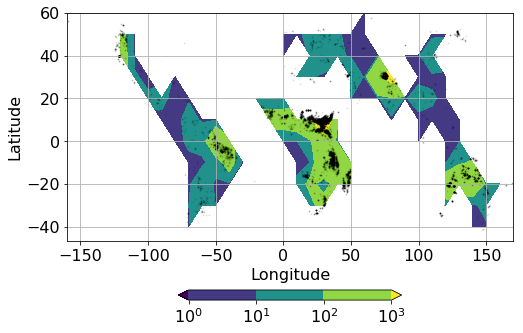

In [47]:
plt.figure()

plt.contourf(X, Y, fire_count_3D, locator=ticker.LogLocator(), extend='both')
plt.colorbar(orientation='horizontal', shrink=0.5)

plt.scatter(fires['Lon'], fires['Lat'], s=0.5, c='black', alpha=0.1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(True)

plt.show()


### 6.4.2 Mesh plots

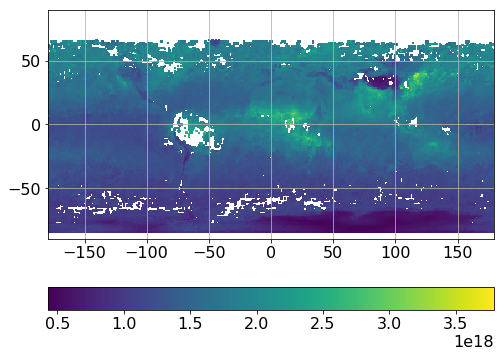

In [48]:
fig, ax = plt.subplots()

im = ax.pcolormesh(lon, lat, co.transpose())
fig.colorbar(im, orientation='horizontal')

plt.grid(True)

plt.show()

In [49]:
# Labels
xlabels = fire_count_3D.columns
ylabels = fire_count_3D.index

C:\Users\rebekah\Anaconda3\lib\site-packages\matplotlib\colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


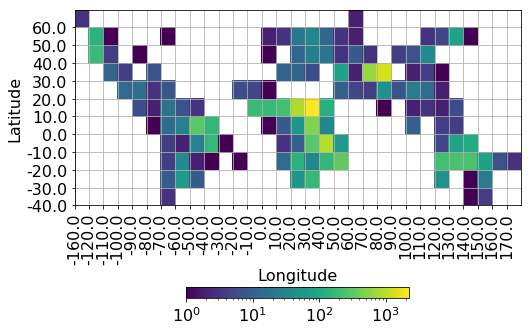

In [51]:
fig, ax = plt.subplots()

im = ax.pcolormesh(fire_count_3D, norm=colors.LogNorm())
fig.colorbar(im, orientation='horizontal', shrink=0.5, pad=0.25)
# ax.invert_yaxis()

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# # Show all ticks
ax.set_xticks(np.arange(len(xlabels)))
ax.set_yticks(np.arange(len(ylabels)))

# # Label label them with the respective list entries
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# # Rotate x labels so they all fit
plt.xticks(rotation=90)

plt.grid(True)

plt.show()